# Titanic Disaster

### A test for survival rate

* PassengerId : Passengers identification number
* Survived: O for passengers who did not survive and 1 for passengers who survived
* Pclass: The class the passanger was in either 1st, second or third class
* Name: The names of the passengers 
* Sex: The passengers gender either male or female
* Age: The age of the various passengers
* Sibsp: If the passengers were with their siblings/spouses or not(1 yes, 0 No)
* Parch: If the passengers had Parents or Children on board
* Ticket: The ticket number for the various passengers
* Fare: The amount paid by each passenger
* Cabin: The desk number
* Embarked: Cities the embarked from

In [1]:
# Getting the necessary libraries ready to read the data 
import pandas as pd 
import numpy as np

In [3]:
# reading and viewing the data
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [4]:
# Grabing insight from the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# confirming how many data is missing in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### We have 891 data for each columns
###### Age column is having 177 missing data , Cabin is having 687 missing data and Embarked has 2 missing data

In [6]:
# checking the shape of th dataframe
titanic_data.shape

(891, 12)

In [8]:
# What datatypes do we have in each columns
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##  visualising our data to get better insight

#### Possible area of interest include:

* Who were the passengers on the Titanic(Ages, Gender, Class)
* What deck were the passengers on and did it relate to their class?
* Where did the passengers come from
* How many passenger boarded alone and how many were with their family
* What factor helped passengers survive the sinking?

In [31]:
# importing the needed libraries for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Sex', ylabel='count'>

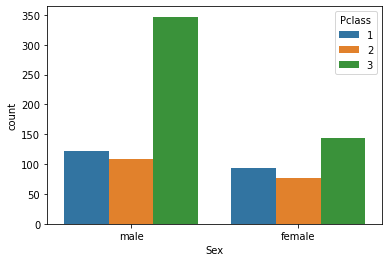

In [40]:
# Let's see what gender boarded the titanic ship and their ratio
sns.countplot('Sex', data=titanic_data, hue="Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

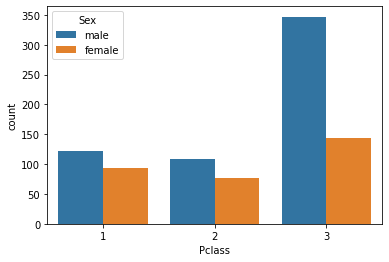

In [41]:
# How about trying it the other way round checking the Class of each gender boarder
sns.countplot("Pclass", data=titanic_data, hue="Sex")

So far we are having more Males on the titanic ship than Females in the various classes.

#### How about children, were they present on the ship?

In [69]:
# Creating a function to handle this!!!
def male_female_child(Passenger):
    Age, Sex = Passenger
    if Age < 16:
        return "child"
    else:
        return Sex


In [70]:
titanic_data["Person"] = titanic_data[["Age", "Sex"]].apply(male_female_child, axis=1)

In [71]:
titanic_data[titanic_data['Person']=="child"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child


<AxesSubplot:xlabel='Person', ylabel='count'>

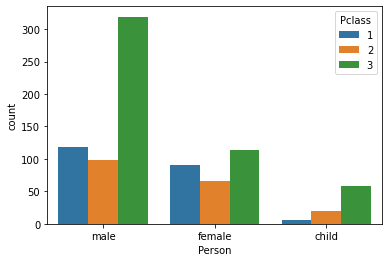

In [72]:
sns.countplot("Person", hue="Pclass", data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

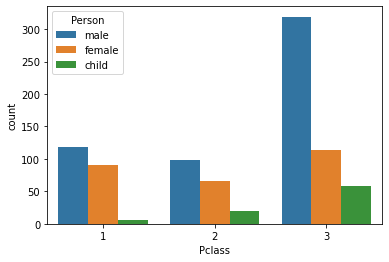

In [73]:
sns.countplot("Pclass", hue="Person", data=titanic_data)

There are more children in third class 

<AxesSubplot:>

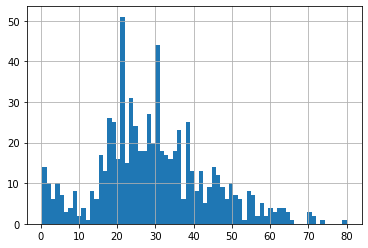

In [74]:
titanic_data['Age'].hist(bins=70)

In [75]:
titanic_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [76]:
titanic_data['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

## Getting good distributions for the categorical columns

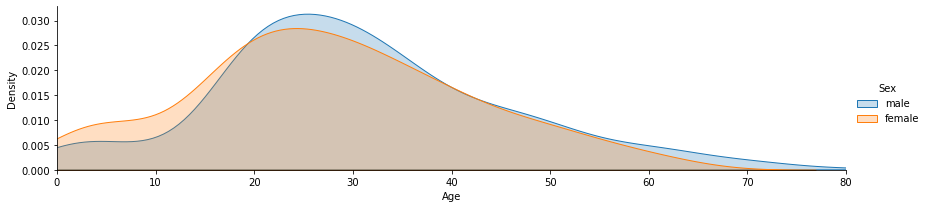

In [77]:
fig = sns.FacetGrid(titanic_data, hue="Sex", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_data['Age'].max()

fig.set(xlim=[0,oldest])
fig.add_legend()

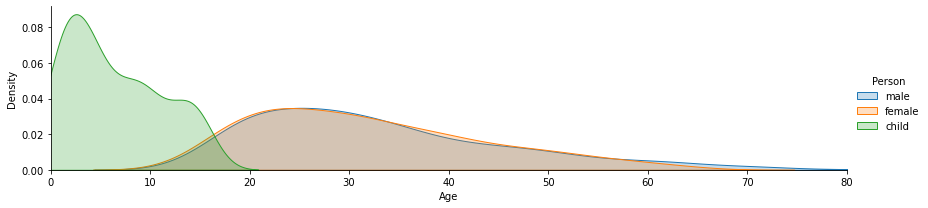

In [78]:
fig = sns.FacetGrid(titanic_data, hue="Person", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_data['Age'].max()

fig.set(xlim=[0,oldest])
fig.add_legend()

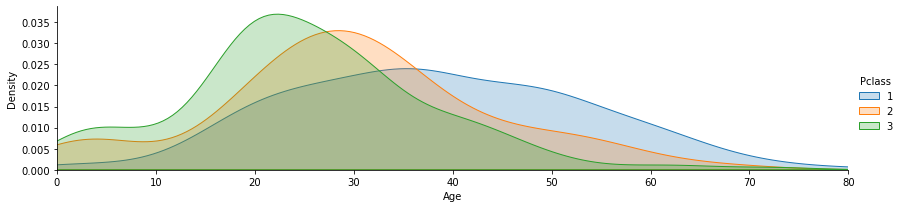

In [79]:
fig = sns.FacetGrid(titanic_data, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_data['Age'].max()

fig.set(xlim=[0,oldest])
fig.add_legend()

### What deck were the passengers on and did it relate to their class?

In [80]:
deck = titanic_data["Cabin"].dropna()

In [81]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [84]:
levels =[]

for level in deck:
    levels.append(level[0])
    
levels[:5]

['C', 'C', 'E', 'G', 'C']

<AxesSubplot:xlabel='Cabin', ylabel='count'>

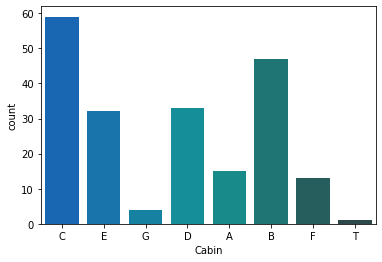

In [92]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.countplot("Cabin", data=cabin_df, palette="winter_d")

In [93]:
cabin_df = cabin_df[cabin_df != "T"]

<AxesSubplot:xlabel='Cabin', ylabel='count'>

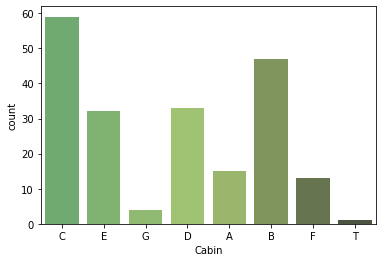

In [95]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.countplot("Cabin", data=cabin_df, palette="summer_d")

### Where did the passengers come from

<AxesSubplot:xlabel='Embarked', ylabel='count'>

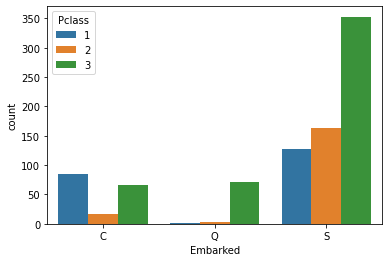

In [99]:
sns.countplot("Embarked", data=titanic_data, hue="Pclass", order=["C", "Q", "S"])

 most passengers came from S

In [100]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [102]:
titanic_data['Embarked'].describe(include="object")

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

## How many passenger boarded alone and how many were with their family

In [106]:
titanic_data["Alone"] = titanic_data["SibSp"] + titanic_data["Parch"] 

In [110]:
titanic_data["Alone"].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

0 here represents that they had no family on board and any thing outside zero means they had one sort of family member or another on board

In [114]:
titanic_data["Alone"].loc[titanic_data["Alone"]>0] = "With Family"
titanic_data["Alone"].loc[titanic_data["Alone"] == 0] = "Alone"
             

In [117]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

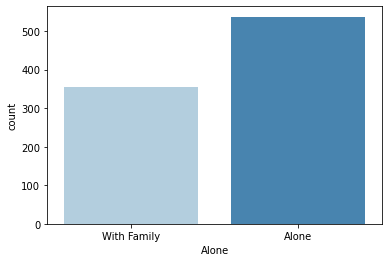

In [119]:
sns.countplot("Alone", data=titanic_data, palette="Blues")

Most of the passengers were alone

In [120]:
titanic_data["Alone"].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

### What factor helped passengers survive the sinking?

<AxesSubplot:xlabel='Survivor', ylabel='count'>

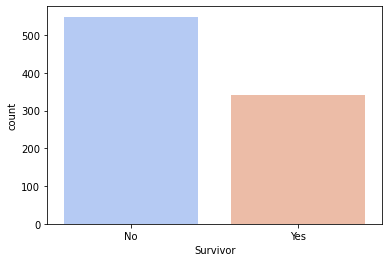

In [123]:
titanic_data["Survivor"] = titanic_data['Survived'].map({0:"No", 1:"Yes"})
sns.countplot("Survivor", data=titanic_data, palette = 'coolwarm')

Most passengers did not survive

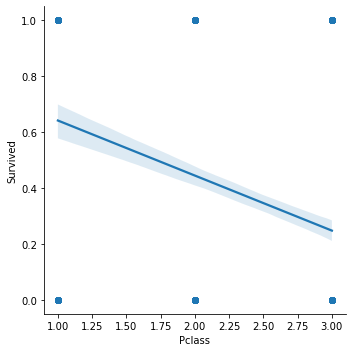

In [132]:
sns.lmplot("Pclass", "Survived", data=titanic_data)

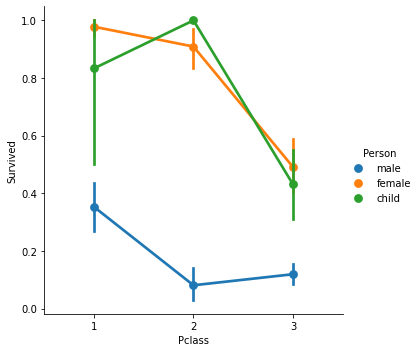

In [134]:
sns.factorplot("Pclass", "Survived", hue="Person", data=titanic_data)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

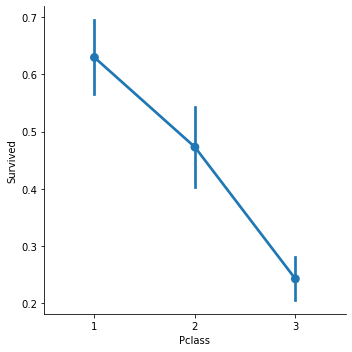

In [135]:
sns.factorplot("Pclass", "Survived", data=titanic_data)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

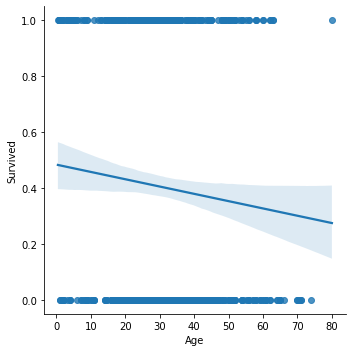

In [136]:
sns.lmplot("Age", "Survived", data=titanic_data)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

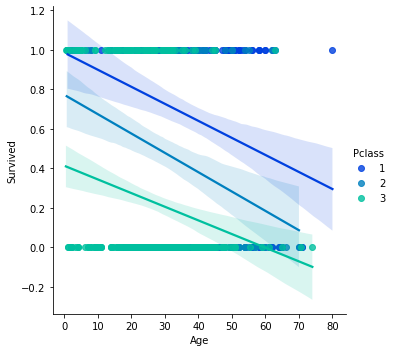

In [138]:
sns.lmplot("Age", "Survived", data=titanic_data, hue="Pclass", palette ="winter")

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

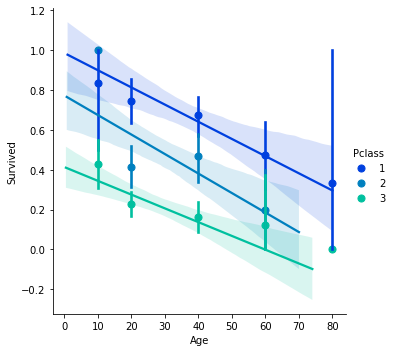

In [139]:
generations = [10,20,40,60,80]

sns.lmplot("Age", "Survived", data=titanic_data, hue="Pclass", palette="winter", x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

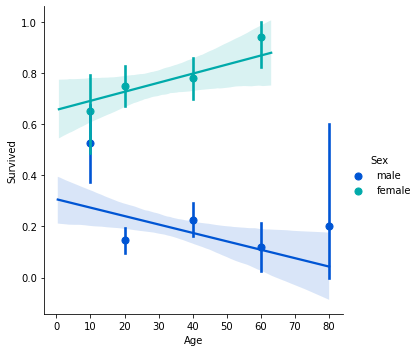

In [141]:
sns.lmplot("Age", "Survived", hue="Sex", palette="winter", data=titanic_data, x_bins=generations)

# Getting more insight from the data

#### Did the deck have an effect on the passengers survival rate?
#### Did having a family member increase the odd of surviving the crash

In [157]:
#Did the deck have an effect on the passengers survival rate?
titanic_df = titanic_data.copy()
#sns.lmplot('deck', "Survived", data=titanic_df, hue="Pclass", palette="winter")

In [156]:
# Did having a family member increase the odd of surviving the crash
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes


In [158]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')